In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [41]:
# Especificamos las líneas celulares PatuT y PatuS siguiendo su nomenclatura de DepMap.
CellLines = {'ACH-000023':'PatuT','ACH-000022':'PatuS'}

# Somatic Mutations

In [43]:
# Lectura de los datos de mutaciones somáticas disponibles en DepMap.
mutations = pd.read_csv('Mutations/OmicsSomaticMutations.csv')
print(mutations)

/tmp/ipykernel_28175/384440886.py:1: DtypeWarning: Columns (20,48,52,54,55,56,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  mutations = pd.read_csv('Mutations/OmicsSomaticMutations.csv')


       Chrom      Pos Ref Alt     AF  DP  RefCount  AltCount   GT         PS  \
0       chr1   818203   G   A  0.240  27        21         6  0/1        NaN   
1       chr1   924657   C   G  0.437  17         9         8  0/1        NaN   
2       chr1   924750   C   T  0.625  19         7        12  0/1        NaN   
3       chr1   924909   G   A  0.285  52        37        15  0/1        NaN   
4       chr1   930198   C   T  0.366  42        27        15  0/1        NaN   
...      ...      ...  ..  ..    ...  ..       ...       ...  ...        ...   
666062  chr5  1295210   T   C  0.800   3         0         3  0/1        NaN   
666063  chr5  1295215   A   T  0.500   2         1         1  0|1  1295215.0   
666064  chr5  1295223   C   A  0.400   4         2         2  0/1        NaN   
666065  chr5  1295257   C   G  0.600   3         1         2  0/1        NaN   
666066  chr5  1295309   G   A  0.500   6         3         3  0/1        NaN   

        ... PharmgkbId DidaID DidaName 

In [44]:
print(mutations.columns)

Index(['Chrom', 'Pos', 'Ref', 'Alt', 'AF', 'DP', 'RefCount', 'AltCount', 'GT',
       'PS', 'VariantType', 'VariantInfo', 'DNAChange', 'ProteinChange',
       'HugoSymbol', 'EnsemblGeneID', 'EnsemblFeatureID', 'HgncName',
       'HgncFamily', 'UniprotID', 'DbsnpRsID', 'GcContent', 'LofGeneName',
       'LofGeneId', 'LofNumberOfTranscriptsInGene',
       'LofPercentOfTranscriptsAffected', 'NMD', 'MolecularConsequence',
       'VepImpact', 'VepBiotype', 'VepHgncID', 'VepExistingVariation',
       'VepManeSelect', 'VepENSP', 'VepSwissprot', 'Sift', 'Polyphen',
       'GnomadeAF', 'GnomadgAF', 'VepClinSig', 'VepSomatic', 'VepPliGeneValue',
       'VepLofTool', 'OncogeneHighImpact', 'TumorSuppressorHighImpact',
       'TranscriptLikelyLof', 'Brca1FuncScore', 'CivicID', 'CivicDescription',
       'CivicScore', 'LikelyLoF', 'HessDriver', 'HessSignature', 'RevelScore',
       'PharmgkbId', 'DidaID', 'DidaName', 'GwasDisease', 'GwasPmID',
       'GtexGene', 'ProveanPrediction', 'Rescue', 'Model

In [45]:
# Filtrado de las columnas con la información de interés para cada mutación somática detectada.
mutations = mutations[['Chrom','Pos','Ref','Alt','GT','VariantType','VariantInfo','EnsemblGeneID',
                       'EnsemblFeatureID','VepENSP','LofGeneName','MolecularConsequence',
                       'VepClinSig','OncogeneHighImpact','TumorSuppressorHighImpact','DidaName',\
                        'GwasDisease','ModelID']]

# Filtrado de las líneas celulares de interés: PatuT y PatuS.
PatuMutations = mutations[mutations['ModelID'].isin(CellLines.keys())]
PatuMutations = PatuMutations.reset_index(drop=True)
print(PatuMutations)

    Chrom       Pos Ref Alt   GT VariantType         VariantInfo  \
0    chr1   2185008   G   C  1|1         SNV           stop_lost   
1    chr1   6124075   G   T  1|1         SNV         stop_gained   
2    chr1  35764503   C   A  0/1         SNV    missense_variant   
3    chr1  58481123   G   T  0/1         SNV    missense_variant   
4    chr1  65601474   G   C  0/1         SNV    missense_variant   
..    ...       ...  ..  ..  ...         ...                 ...   
255  chrM      3394   T   C  1|1         SNV    missense_variant   
256  chrX  23935254   G   A  0/1         SNV    missense_variant   
257  chrX  26217912   G   T  0/1         SNV    missense_variant   
258  chrX  54541322   A   T  0/1         SNV    missense_variant   
259  chrX  64191919  AG   A  0/1    deletion  frameshift_variant   

       EnsemblGeneID EnsemblFeatureID          VepENSP LofGeneName  \
0    ENSG00000067606  ENST00000378567  ENSP00000367830         NaN   
1    ENSG00000116254  ENST00000262450  ENSP

In [46]:
# Filtrado de las mutaciones pertenecientes a PatuT.
PatuTMutations = PatuMutations[PatuMutations['ModelID'] == 'ACH-000023']
PatuTMutations = PatuTMutations.reset_index(drop = True)

# Filtrado de las mutaciones pertenecientes a PatuS.
PatuSMutations = PatuMutations[PatuMutations['ModelID'] == 'ACH-000022']
PatuSMutations = PatuSMutations.reset_index(drop = True)

In [47]:
print(PatuTMutations)

    Chrom        Pos Ref Alt   GT VariantType         VariantInfo  \
0    chr1    2185008   G   C  1|1         SNV           stop_lost   
1    chr1    6124075   G   T  1|1         SNV         stop_gained   
2    chr1   35764503   C   A  0/1         SNV    missense_variant   
3    chr1   58481123   G   T  0/1         SNV    missense_variant   
4    chr1   65601474   G   C  0/1         SNV    missense_variant   
..    ...        ...  ..  ..  ...         ...                 ...   
133  chrX   14609088   G   T  0/1         SNV    missense_variant   
134  chrX   54541322   A   T  0/1         SNV    missense_variant   
135  chrX   64191919  AG   A  0/1    deletion  frameshift_variant   
136  chrX  136659294   C   A  0/1         SNV    missense_variant   
137  chrX  143517346   G   A  0/1         SNV    missense_variant   

       EnsemblGeneID EnsemblFeatureID          VepENSP LofGeneName  \
0    ENSG00000067606  ENST00000378567  ENSP00000367830         NaN   
1    ENSG00000116254  ENST00000

In [48]:
print(PatuSMutations)

    Chrom        Pos Ref Alt   GT   VariantType         VariantInfo  \
0    chr1    1072264   G   T  0/1           SNV         stop_gained   
1    chr1    6249804   C   T  0/1           SNV    missense_variant   
2    chr1   47219924  AG  CC  0|1  substitution    missense_variant   
3    chr1  114402828   C   G  1|1           SNV    missense_variant   
4    chr1  171208921   A   G  0/1           SNV    missense_variant   
..    ...        ...  ..  ..  ...           ...                 ...   
117  chrM       3394   T   C  1|1           SNV    missense_variant   
118  chrX   23935254   G   A  0/1           SNV    missense_variant   
119  chrX   26217912   G   T  0/1           SNV    missense_variant   
120  chrX   54541322   A   T  0/1           SNV    missense_variant   
121  chrX   64191919  AG   A  0/1      deletion  frameshift_variant   

       EnsemblGeneID EnsemblFeatureID          VepENSP LofGeneName  \
0    ENSG00000237330  ENST00000453464  ENSP00000410533         NaN   
1    EN

In [49]:
# Función que recoge y ordena información correspondiente a las mutaciones somáticas y sus genes dada la información pertinente.
def MutationStats(df, label, output_file="output.txt"):

    # Función que toma la información correspondiente a un gen dividida en columnas y la organiza en forma de una lista de características
    # para después almacenarla en un archivo de texto.
    def ComplementaryGeneInfo(df, index, column, columnlabel, file):
        if columnlabel == 'Gene':
            if (df.iloc[index, df.columns.get_loc(column)]).any():
                print(f'{columnlabel}: {(df.iloc[index, df.columns.get_loc(column)]).item()}', file=file)
        else:
            if (df.iloc[index, df.columns.get_loc(column)]).any():
                print(f'    {columnlabel}: {(df.iloc[index, df.columns.get_loc(column)]).item()}', file=file)
    
    # Función que hace un recuento de todas las entradas correspondientes a una característica dada y lo almacena en forma de un archivo de texto. 
    def StatCal(df, column, columnlabel, file):
        if columnlabel != 'Gene':
            dfclean = df[df[column].notna()]
            columndata = dfclean.groupby(column).size()
            if not columndata.empty:
                print(f'{columnlabel} Distribution in {label}:', file=file)
                print('', file=file)
                print(columndata.to_string(header=False), file=file)
                print('------------------', file=file)
    
    # Información de interés para cada gen detectado con una mutación de pérdida de función:
    complinfo = {'LofGeneName':'Gene', 'Chrom':'Chromosome', 'Pos':'Position', 
                 'Ref':'Reference Allele', 'Alt':'Alternate Allele', 'GT':'Genotype', 
                 'EnsemblGeneID':'ENSEMBL Gene ID','EnsemblFeatureID':'ENSEMBL Transcript ID', 
                 'VepENSP':'ENSEMBL Protein ID','VariantType':'Type of variant', 
                 'VariantInfo':'Variant Consequence','MolecularConsequence':'Molecular Consequence', 
                 'VepClinSig':'Clinical Sign','DidaName':'Digenic Diseases', 
                 'GwasDisease':'Diseases in GWAS-catalog studies',
                 'OncogeneHighImpact':'Oncogenic Mutation',
                 'TumorSuppressorHighImpact':'Tumor Suppressor Mutation'}
    
    # Información de interés a cuantificar estadísticamente:
    statinfo = {'VariantType':'Type of Variant', 'VariantInfo':'Variant Consequence',
                'MolecularConsequence':'Molecular Consequence', 'VepClinSig':'Clinical Sign',
                'DidaName':'Digenic Diseases', 'GwasDisease':'Diseases in GWAS-catalog studies'}
    
    # Creación del archivo que almacenará la información generada por las funciones previas.
    with open(output_file, "w") as file:
        print('Loss of Function Genes:', file = file)
        print('', file = file)

        # Recopilación de los genes con mutaciones de pérdida de función según la información dada:
        genelist = set(df[df['LofGeneName'].notna()]['LofGeneName'].tolist())

        # Identificación del índice de cada gen y recolección de la información en ese índice para llamra a la función ComplemetaryGeneInfo().
        for gene in genelist:
            generowindex = df.index[df['LofGeneName'] == gene]
            for i in generowindex:
                index = pd.Index([i], dtype='int64')
                for i in range(len(complinfo)):
                    ComplementaryGeneInfo(df, index, list(complinfo.keys())[i], list(complinfo.values())[i], file)
                print('', file=file)
        print('------------------', file=file)

        # Por cada entrada de interés, llamada de la función StatCal(). 
        for i in range(len(statinfo)):
            StatCal(df, list(statinfo.keys())[i], list(statinfo.values())[i], file)
        print(f'Oncogenic Mutations: {df["OncogeneHighImpact"].sum()}', file = file)
        print('------------------', file = file)
        print(f'Tumor Suppressor Mutations: {df["TumorSuppressorHighImpact"].sum()}', file = file)
        print('------------------', file = file)

        print(f'Analysis saved as {output_file}')

        genelistU = list(genelist)

        return genelistU


In [50]:
PatuTLoFGeneList = MutationStats(PatuTMutations, 'PatuT', 'PatuT_SomaticMutationStats.txt')
print(PatuTLoFGeneList)

Analysis saved as PatuT_SomaticMutationStats.txt
['PODNL1', 'SLC15A5', 'SOX12', 'CAPN13', 'C2CD4A', 'AMER1', 'NLRP3', 'TMPRSS5', 'PRSS38', 'ZNF132', 'USP7', 'GJB2', 'CYP1A2', 'ZNF622', 'CFAP36', 'CHD5', 'TNFAIP1', 'IQGAP2', 'FAM151B', 'LRP2', 'MRE11']


In [51]:
PatuSLoFGeneList = MutationStats(PatuSMutations, 'PatuS', 'PatuS_SomaticMutationStats.txt')
print(PatuSLoFGeneList)

Analysis saved as PatuS_SomaticMutationStats.txt
['CAPN13', 'NRTN', 'PRSS38', 'CFAP36', 'AMER1', 'TNFAIP1', 'CHEK1', 'USP7', 'FAM151B', 'TNS4', 'TYRO3', 'SOX12', 'GAB2', 'MRE11', 'CDH9']


In [52]:
# Una vez obtenidos los genes con mutaciones de pérdida de función, intersección de los mismos para obtener aquellos comúnes y 
# aquellos exclusivos a PatuT y a PatuS.

Common_Genes = (set(PatuTLoFGeneList)).intersection(set(PatuSLoFGeneList))
print(f'Common Genes: {Common_Genes}')

UniquePatuTGenes = ((set(PatuTLoFGeneList)))-(set(Common_Genes))
print(f'Exclusive PatuT Genes: {UniquePatuTGenes}')

UniquePatuSGenes = ((set(PatuSLoFGeneList)))-(set(Common_Genes))
print(f'Exclusive PatuS Genes: {UniquePatuSGenes}')

Common Genes: {'CAPN13', 'PRSS38', 'CFAP36', 'AMER1', 'TNFAIP1', 'FAM151B', 'USP7', 'SOX12', 'MRE11'}
Exclusive PatuT Genes: {'TMPRSS5', 'GJB2', 'PODNL1', 'C2CD4A', 'SLC15A5', 'CYP1A2', 'ZNF622', 'ZNF132', 'CHD5', 'IQGAP2', 'NLRP3', 'LRP2'}
Exclusive PatuS Genes: {'NRTN', 'CHEK1', 'TNS4', 'TYRO3', 'GAB2', 'CDH9'}


# HotSpot Mutations

In [55]:
# Lectura de los datos de mutaciones de punto caliente disponibles en DepMap.
mutationsHS = pd.read_csv('Mutations/OmicsSomaticMutationsMatrixHotspot.csv', index_col = 0)
print(mutationsHS)

            PIK3CD (5293)  MTOR (2475)  KLHDC7A (127707)  ARID1A (8289)  \
ACH-000062            0.0          0.0               0.0            0.0   
ACH-000693            0.0          0.0               0.0            0.0   
ACH-000930            0.0          0.0               0.0            0.0   
ACH-001691            0.0          0.0               0.0            0.0   
ACH-000956            0.0          0.0               0.0            0.0   
...                   ...          ...               ...            ...   
ACH-000083            0.0          0.0               0.0            0.0   
ACH-000134            0.0          0.0               0.0            0.0   
ACH-000131            0.0          0.0               0.0            0.0   
ACH-000165            0.0          0.0               0.0            0.0   
ACH-002018            0.0          0.0               0.0            0.0   

            ZSCAN20 (7579)  CSMD2 (114784)  EIF2B3 (8891)  HPDL (84842)  \
ACH-000062             0

In [56]:
mutationsHS.columns = [col.split(' ')[0] for col in mutationsHS.columns]
print(mutationsHS)

            PIK3CD  MTOR  KLHDC7A  ARID1A  ZSCAN20  CSMD2  EIF2B3  HPDL  STIL  \
ACH-000062     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000693     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000930     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-001691     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000956     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
...            ...   ...      ...     ...      ...    ...     ...   ...   ...   
ACH-000083     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000134     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000131     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000165     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-002018     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   

            C1orf141  ...  

In [57]:
# Filtrado de los datos para obtener aquellos correspondientes a las líneas celulares de interés.
PatuMutationsHS = mutationsHS.loc[CellLines.keys(),:]
print(PatuMutationsHS)

            PIK3CD  MTOR  KLHDC7A  ARID1A  ZSCAN20  CSMD2  EIF2B3  HPDL  STIL  \
ACH-000023     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   
ACH-000022     0.0   0.0      0.0     0.0      0.0    0.0     0.0   0.0   0.0   

            C1orf141  ...   AR  MED12  ATRX  TRPC5  AMOT  DCAF12L2  GPC3  \
ACH-000023       0.0  ...  0.0    0.0   0.0    0.0   0.0       0.0   0.0   
ACH-000022       0.0  ...  0.0    0.0   0.0    0.0   0.0       0.0   0.0   

            MAGEC1  GABRE  AGAP5  
ACH-000023     0.0    0.0    0.0  
ACH-000022     0.0    0.0    0.0  

[2 rows x 525 columns]


In [58]:
# Obtención de aquellos genes con mutaciones de punto caliente en PatuT o en PatuS.
PatuMutationsHSFilter = PatuMutationsHS.loc[:, (PatuMutationsHS != 0).any(axis = 0)]
print(PatuMutationsHSFilter)

            KRAS  TP53
ACH-000023   2.0   2.0
ACH-000022   2.0   2.0


PatuT y PatuS tienen ambas mutaciones de punto caliente en los genes KRAS y TP53.

# Damaging Mutations

In [64]:
# Lectura de los datos sobre mutaciones deletéreas de DepMap.
mutationsDMG = pd.read_csv('Mutations/OmicsSomaticMutationsMatrixDamaging.csv', index_col = 0)
print(mutationsDMG)

            FAM87B (400728)  LINC01128 (643837)  SAMD11 (148398)  \
ACH-000062              1.0                 0.0              0.0   
ACH-000693              0.0                 0.0              0.0   
ACH-000930              0.0                 0.0              0.0   
ACH-001691              0.0                 0.0              0.0   
ACH-000956              0.0                 0.0              0.0   
...                     ...                 ...              ...   
ACH-000083              0.0                 0.0              0.0   
ACH-000134              0.0                 0.0              0.0   
ACH-000131              0.0                 0.0              0.0   
ACH-000165              0.0                 0.0              0.0   
ACH-002018              0.0                 0.0              0.0   

            NOC2L (26155)  KLHL17 (339451)  PERM1 (84808)  HES4 (57801)  \
ACH-000062            0.0              0.0            0.0           0.0   
ACH-000693            0.0        

In [65]:
mutationsDMG.columns = [col.split(' ')[0] for col in mutationsDMG.columns]
print(mutationsDMG)

            FAM87B  LINC01128  SAMD11  NOC2L  KLHL17  PERM1  HES4  ISG15  \
ACH-000062     1.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000693     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000930     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-001691     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000956     0.0        0.0     0.0    0.0     1.0    0.0   0.0    0.0   
...            ...        ...     ...    ...     ...    ...   ...    ...   
ACH-000083     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000134     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000131     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000165     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-002018     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   

            AGRN  RNF223  ...  TRMT1P1  SRY  RPS4Y1  RBMY1A3P  CHEK2P1  \
ACH-000062   

In [66]:
# Filtrado de los datos para obtener aquellos correspondientes a las líneas celulares de interés.
PatuMutationsDMG = mutationsDMG.loc[CellLines.keys(),:]
print(PatuMutationsDMG)

            FAM87B  LINC01128  SAMD11  NOC2L  KLHL17  PERM1  HES4  ISG15  \
ACH-000023     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   
ACH-000022     0.0        0.0     0.0    0.0     0.0    0.0   0.0    0.0   

            AGRN  RNF223  ...  TRMT1P1  SRY  RPS4Y1  RBMY1A3P  CHEK2P1  \
ACH-000023   0.0     0.0  ...      0.0  0.0     0.0       0.0      0.0   
ACH-000022   0.0     1.0  ...      0.0  0.0     0.0       0.0      0.0   

            ARSDP1  ANOS2P  TTTY13  TPTE2P4  PARP4P1  
ACH-000023     0.0     0.0     0.0      0.0      0.0  
ACH-000022     0.0     0.0     0.0      0.0      0.0  

[2 rows x 18748 columns]


In [67]:
# Obtención de aquellos genes con mutaciones deletéreas en PatuT o en PatuS.
PatuMutationsDMGFilter = PatuMutationsDMG.loc[:, (PatuMutationsDMG != 0).any(axis = 0)]
print(PatuMutationsDMGFilter)

            RNF223  PRKCZ  CHD5  PRSS38  NLRP3  GAB2  MRE11  TMPRSS5  CHEK1  \
ACH-000023     0.0    2.0   2.0     1.0    1.0   0.0    1.0      1.0    0.0   
ACH-000022     1.0    0.0   0.0     1.0    0.0   1.0    1.0      0.0    1.0   

            SLC15A5  ...  CAPN13  CFAP36  LRP2  SOX12  ZNF622  CDH9  IQGAP2  \
ACH-000023      2.0  ...     1.0     1.0   1.0    1.0     1.0   0.0     1.0   
ACH-000022      0.0  ...     1.0     1.0   0.0    1.0     0.0   1.0     0.0   

            FAM151B  OR2H1  AMER1  
ACH-000023      1.0    1.0    1.0  
ACH-000022      1.0    0.0    1.0  

[2 rows x 32 columns]


In [68]:
# Obtención de las listas de genes que contienen mutaciones deletéreas en PatuT o en PatuS respectivamente.
PatuTDMGGenes = set(PatuMutationsDMG.columns[PatuMutationsDMG.loc['ACH-000023'] != 0.0])
PatuSDMGGenes = set(PatuMutationsDMG.columns[PatuMutationsDMG.loc['ACH-000022'] != 0.0])

# Obtención de los genes con mutaciones deletéreas en PatuT y PatuS al mismo tiempo.
PatuDMGInt = PatuMutationsDMGFilter.loc['ACH-000023'] == PatuMutationsDMGFilter.loc['ACH-000022']
PatuMutationsDMGInt = PatuMutationsDMGFilter.loc[:, PatuDMGInt]

In [70]:
# Lista de genes con mutaciones deletéreas en PatuT y PatuS al mismo tiempo.
Common_DMG_Genes = set(PatuMutationsDMGInt.columns)
print(f'Common Genes: {Common_DMG_Genes}')

# Obtención de los genes con mutaciones exclusivas en PatuT y en PatuS respectivamente
UniquePatuTDMGGenes = PatuTDMGGenes - Common_DMG_Genes
print(f'Exclusive PatuT Genes: {UniquePatuTDMGGenes}')
UniquePatuSDMGGenes = PatuSDMGGenes - Common_DMG_Genes
print(f'Exclusive PatuS Genes: {UniquePatuSDMGGenes}')

Common Genes: {'CAPN13', 'ZNF773', 'PRSS38', 'CFAP36', 'AMER1', 'TNFAIP1', 'FAM151B', 'USP7', 'TP53', 'SOX12', 'MRE11'}
Exclusive PatuT Genes: {'TMPRSS5', 'GJB2', 'PODNL1', 'C2CD4A', 'OR2H1', 'SLC15A5', 'CYP1A2', 'PRKCZ', 'ZNF622', 'ZNF132', 'CHD5', 'IQGAP2', 'NLRP3', 'LRP2'}
Exclusive PatuS Genes: {'NRTN', 'CHEK1', 'TNS4', 'TYRO3', 'GAB2', 'RNF223', 'CDH9'}


In [107]:
# Función que convierte una lista de genes en una cadena para utilizarse como etiqueta en un diagrama de Venn.
# Si se incluye una segunda lista, se pueden remarcar los genes comunes a la primera, permitiendo destacar alguna característica.
def LabelGenerator(list, common):

    gene_labels = ''
    for gene in list:
        if gene in common:
            # Los genes que aparecen en la segunda lista dada son marcados con un asterisco.
            gene_labels += (f'{gene}*\n')
        else:
            gene_labels += (f'{gene}\n')

    return gene_labels

In [108]:
PatuTDMGlabels = LabelGenerator(UniquePatuTDMGGenes, UniquePatuTGenes)
print(PatuTDMGlabels)
PatuSDMGlabels = LabelGenerator(UniquePatuSDMGGenes, UniquePatuSGenes)
print(PatuSDMGlabels)
InterDMGlabels = LabelGenerator(Common_DMG_Genes, Common_Genes)
print(InterDMGlabels)

TMPRSS5*
GJB2*
PODNL1*
C2CD4A*
OR2H1
SLC15A5*
CYP1A2*
PRKCZ
ZNF622*
ZNF132*
CHD5*
IQGAP2*
NLRP3*
LRP2*

NRTN*
CHEK1*
TNS4*
TYRO3*
GAB2*
RNF223
CDH9*

CAPN13*
ZNF773
PRSS38*
CFAP36*
AMER1*
TNFAIP1*
FAM151B*
USP7*
TP53
SOX12*
MRE11*



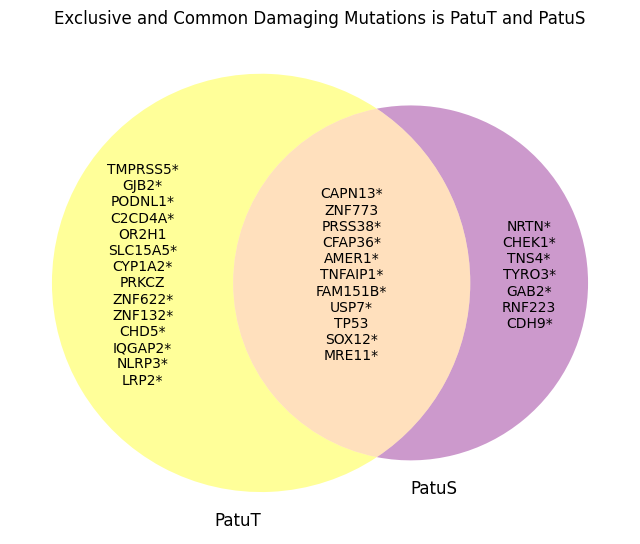

In [109]:
# Generación del diagrama de Venn que muestra las mutaciones deletéreas comunes y exclusivas de PatuT y PatuS.
# Con un asterisco se resaltan aquellas que son de pérdida de función.

plt.figure(figsize=(8,8))

Inter_DMG_Diagram = venn2([PatuTDMGGenes, PatuSDMGGenes], ('PatuT', 'PatuS'), set_colors=('yellow','purple'))

Inter_DMG_Diagram.get_label_by_id('10').set_text(PatuTDMGlabels)
Inter_DMG_Diagram.get_label_by_id('01').set_text(PatuSDMGlabels)
Inter_DMG_Diagram.get_label_by_id('11').set_text(InterDMGlabels)

plt.title('Exclusive and Common Damaging Mutations is PatuT and PatuS')
plt.savefig('DMGGene_Venn.png')

plt.show()

In [73]:
# Obtención de las mutaciones deletéreas que son exclusivas a PatuT y a PatuS en un mismo conjunto de datos.
PatuDMGDiff = PatuMutationsDMGFilter.loc['ACH-000023'] != PatuMutationsDMGFilter.loc['ACH-000022']
PatuMutationsDMGDiff = PatuMutationsDMGFilter.loc[:, PatuDMGDiff]
print(PatuMutationsDMGDiff)

            RNF223  PRKCZ  CHD5  NLRP3  GAB2  TMPRSS5  CHEK1  SLC15A5  GJB2  \
ACH-000023     0.0    2.0   2.0    1.0   0.0      1.0    0.0      2.0   1.0   
ACH-000022     1.0    0.0   0.0    0.0   1.0      0.0    1.0      0.0   0.0   

            TYRO3  ...  CYP1A2  TNS4  NRTN  PODNL1  ZNF132  LRP2  ZNF622  \
ACH-000023    0.0  ...     1.0   0.0   0.0     1.0     1.0   1.0     1.0   
ACH-000022    1.0  ...     0.0   1.0   1.0     0.0     0.0   0.0     0.0   

            CDH9  IQGAP2  OR2H1  
ACH-000023   0.0     1.0    1.0  
ACH-000022   1.0     0.0    0.0  

[2 rows x 21 columns]


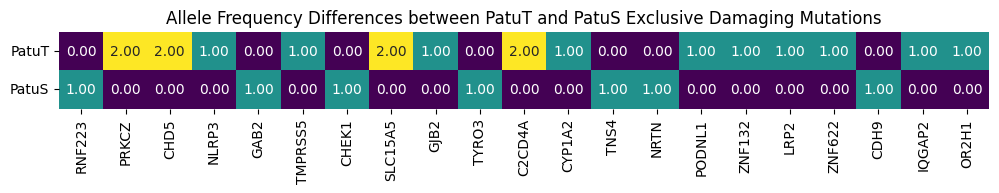

In [74]:
# Representación de las frecuencias alélicas de las mutaciones exclusivas a PatuT y a PatuS.
plt.figure(figsize=(12,1))
sns.heatmap(PatuMutationsDMGDiff, cmap='viridis', annot=True, fmt=".2f", yticklabels=CellLines.values(), cbar = False)
plt.title('Allele Frequency Differences between PatuT and PatuS Exclusive Damaging Mutations')
plt.savefig('DMGMutation_Comparison.png', bbox_inches='tight')

plt.show()